In [7]:
from ThermalModel import model

In [8]:
#Take the parameters (should be after optimization) and create the thermal model with these parameters
parameters = [8.42040975e-01, 9.07199349e-01, 8.30888607e-01, 1.01678353e+00,
       1.01553883e+00, 8.66141672e-01, 9.60239456e-01, 9.45792720e-01,
       2.31437101e+00, 1.73752783e+00, 1.93418497e+00, 2.06772780e+00,
       2.10182587e+00, 2.12738584e+00, 2.33342418e+00, 4.00000013e+04,
       4.00000025e+04, 8.00000004e+04, 1.99999996e+04, 3.99999996e+04,
       5.00000034e+04, 3.00000008e+04, 4.73782938e-01, 3.01802666e+00,
       9.82772549e-01, 9.89680582e-01, 1.01587378e+00, 2.00787922e+00]

model = model()
model.setParameters(parameters)

In [64]:

paramsIDs = ['f', 'q', 'q', 'q', 'q', 'q', 'q', 'q',\
    'R', 'R', 'R', 'R', 'R', 'R', 'R',\
    'C', 'C', 'C', 'C', 'C', 'C', 'C',\
    'R', 'R', 'R', 'R', 'R', 'R']

#Prior belief we have about the parameters befor trainig
def getArguments(label):
    if label == 'f':
        loc =0
        scale = 10
    elif label == 'q':
        loc = 0
        scale = 100
    elif label == 'R':
        loc = 0
        scale = 100
    elif label == 'C':
        loc = 10**4
        scale = 10000
    return loc, scale

In [65]:
from scipy.stats import uniform 
import numpy as np

#Define the prior and the posterior belief
def log_prior( params = None):
    tot = 0
    for i, p in enumerate(params):
        l, s = getArguments(paramsIDs[i])
        tot += uniform.logpdf(p, loc=l, scale=s)
    return tot



In [66]:

def log_posterior(params = None):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    tmp = lp + model.log_likelihood(params, training = True)
    if not np.isfinite(tmp):
        return -np.inf
    #print(params)
    #print(tmp)
    return tmp

In [67]:
n_variable = 28
number = 100#for test


In [68]:
import emcee
import multiprocess as mp

pos = model.parameters + 1e-1 * np.random.randn(56, n_variable) #nwalkers and ndim
nwalkers, ndim = pos.shape

with mp.Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, 
                                    args=(), pool=pool)
    sampler.run_mcmc(pos, number, progress=True)

  0%|          | 0/100 [00:00<?, ?it/s]/Users/guillaumevrijens/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 100/100 [00:10<00:00,  9.49it/s]


In [69]:
lastSampler = sampler

In [70]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'step number')

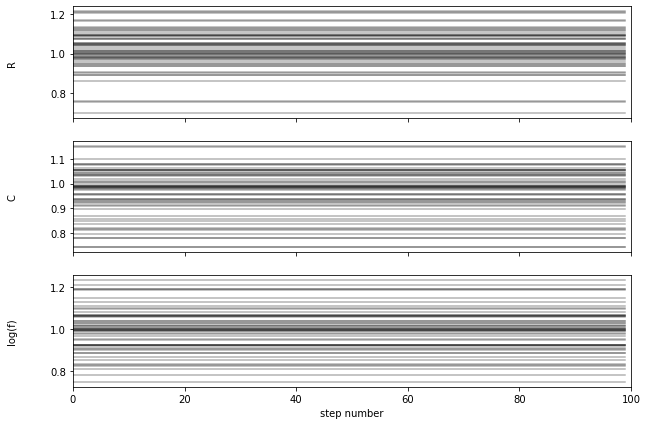

In [74]:
#To spot problems
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = lastSampler.get_chain()
labels = ["R", "C", "log(f)"]

for i in range(3):

    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [1]:
import multiprocess as mp

def f(x):
    return x*x

with mp.Pool(5) as pool:
    print(pool.map(f, [1, 2, 3, 4, 5]))

[1, 4, 9, 16, 25]
